In [15]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error



# 1. Random Forest Regression Tree

Prepare data

In [11]:
#Load Data
df = pd.read_csv('data/train_data.csv')

#Prepare Features and Target
X = df.drop('resale_price', axis=1)
y = df['resale_price']

#Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



Initialize and Evaluate first round of Decision Tree

In [ ]:
#Initialize and Train a Decision Tree
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

#Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
print(f'Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}')
print(f'Decision Tree R²: {r2_score(y_test, y_pred_dt):.2f}')

Visualize the Decision Tree (Simplified)

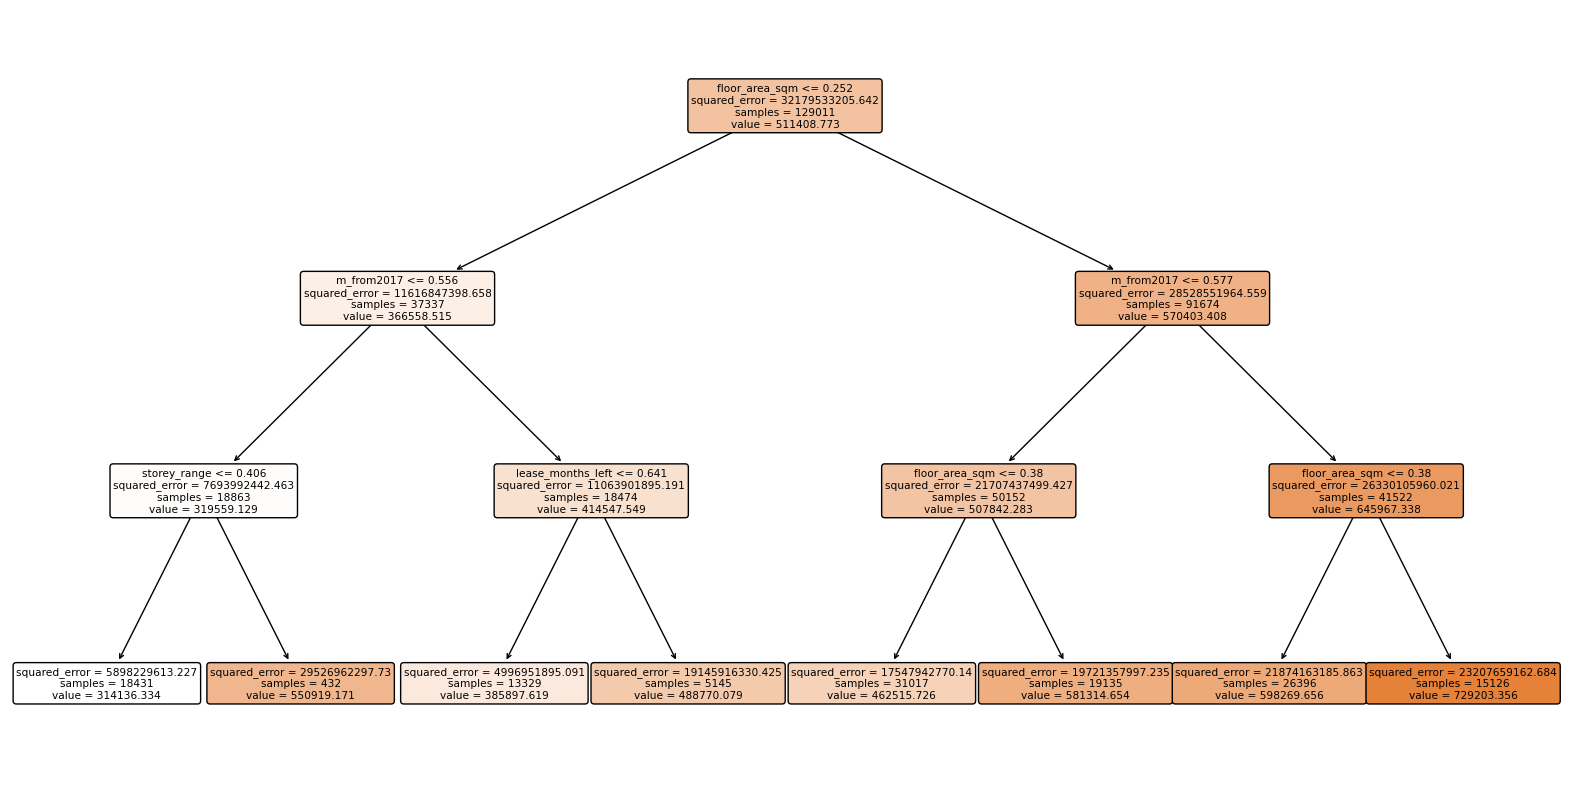

RandomForestRegressor(random_state=42)

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()

#Initialize and Train a Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

### Random Search (Hyperparameter Tuning)

In [12]:
# Decision Tree Hyperparameters
dt_param_dist = {
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

dt_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=dt_param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
dt_search.fit(X_train, y_train)
best_dt = dt_search.best_estimator_
print("Best Decision Tree Parameters:", dt_search.best_params_)

# Random Forest Hyperparameters
rf_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("Best Random Forest Parameters:", rf_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Decision Tree Parameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}



Tuned Decision Tree Performance:
MAE: 31163.03
MSE: 2147914838.44
R²: 0.93

Tuned Random Forest Performance:
MAE: 25091.14
MSE: 1311438090.34
R²: 0.96

Top 10 Features (Tuned Random Forest):
                      Feature  Importance
1              floor_area_sqm    0.200783
3                  m_from2017    0.154113
2                   flat_type    0.137630
4           lease_months_left    0.104395
0                storey_range    0.069983
14           town_bukit merah    0.027170
37      flat_model_Maisonette    0.025590
33  flat_model_New Generation    0.024426
22            town_queenstown    0.022667
39            flat_model_DBSS    0.018101


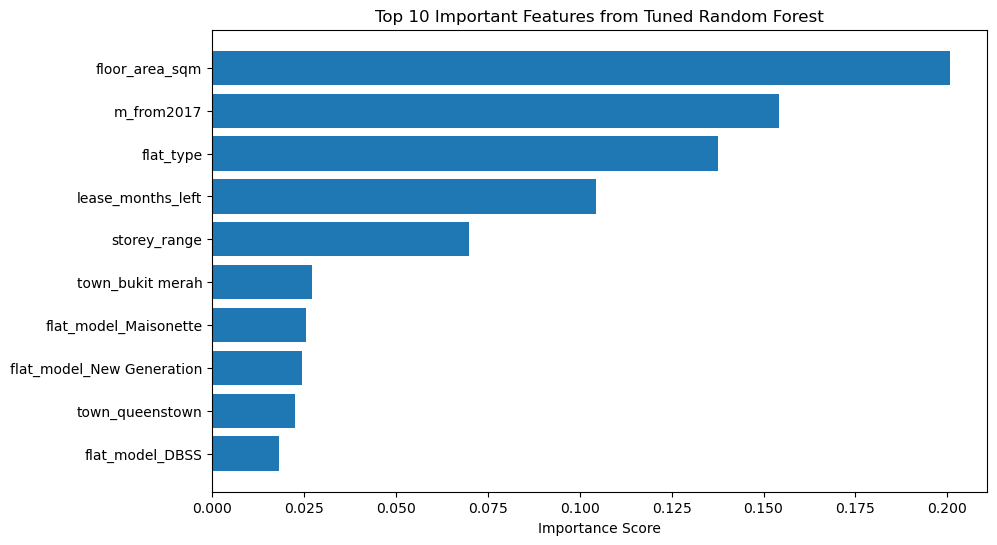

In [19]:
# Tuned Decision Tree
y_pred_dt_tuned = best_dt.predict(X_test)
print('\nTuned Decision Tree Performance:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_dt_tuned):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_dt_tuned):.2f}')
print(f'R²: {r2_score(y_test, y_pred_dt_tuned):.2f}')

# Tuned Random Forest
y_pred_rf_tuned = best_rf.predict(X_test)
print('\nTuned Random Forest Performance:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf_tuned):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf_tuned):.2f}')
print(f'R²: {r2_score(y_test, y_pred_rf_tuned):.2f}')

# Update Feature Importance to use tuned model (Replace original Step 11)
# Step 13: Feature Importance Analysis with Tuned Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Features (Tuned Random Forest):")
print(feature_importance.head(10))

# Step 14: Visualize Feature Importance (Updated)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features from Tuned Random Forest')
plt.xlabel('Importance Score')
plt.show()

Plot Residuals

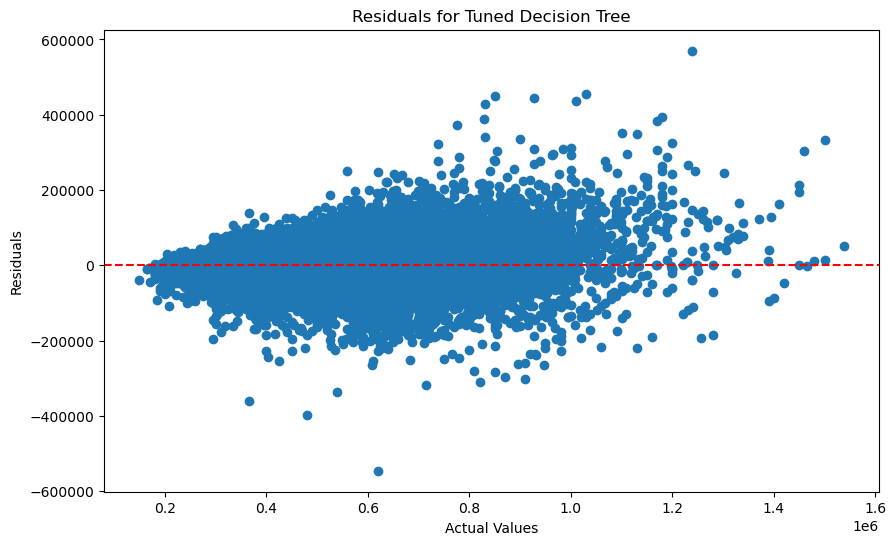

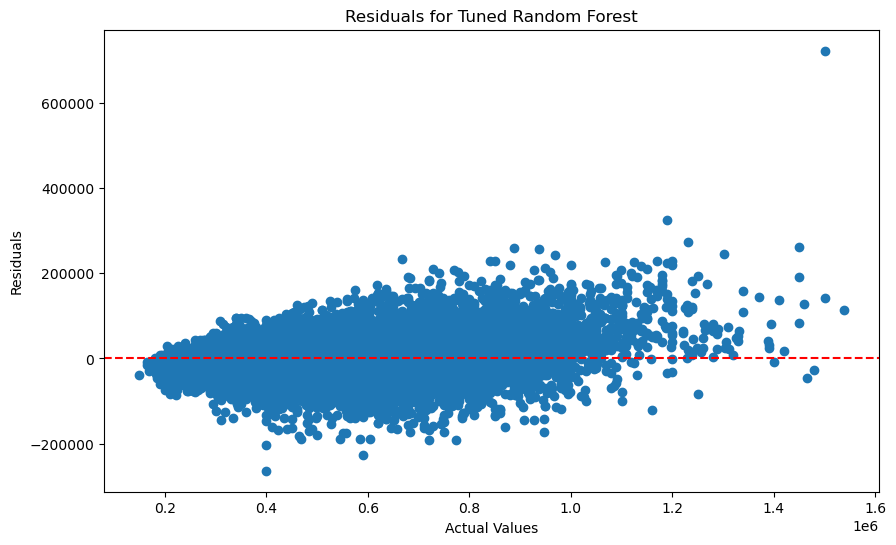

In [20]:
import matplotlib.pyplot as plt

# Residuals for Tuned Decision Tree
residuals_dt = y_test - y_pred_dt_tuned
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_dt)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for Tuned Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Residuals for Tuned Random Forest
residuals_rf = y_test - y_pred_rf_tuned
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for Tuned Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

Residuals:


# xgboost and Adaboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [23]:
# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print('\nXGBoost Performance:')
print(f'MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}')
print(f'R²: {r2_score(y_test, y_pred_xgb):.2f}')


XGBoost Performance:
MSE: 1563698049.66
MAE: 28454.02
R²: 0.95


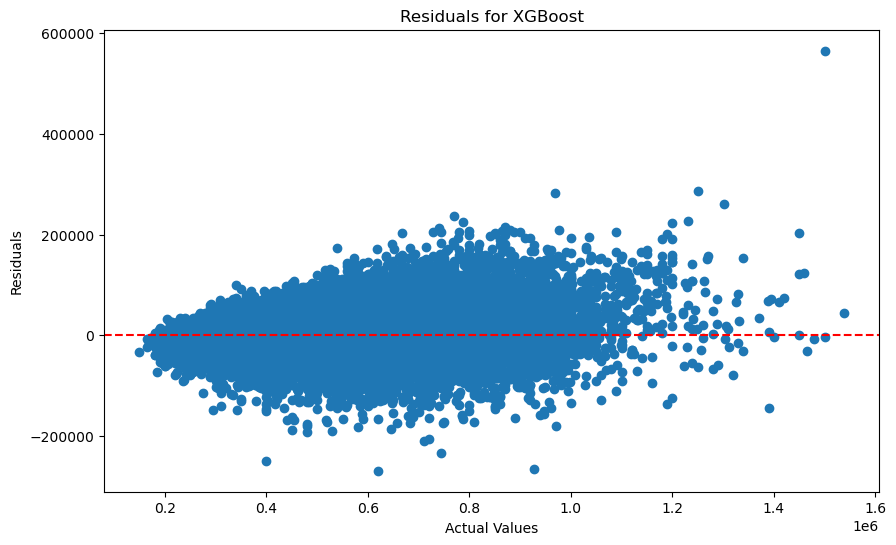

In [24]:
# Residuals for XGBoost
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_xgb)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for XGBoost')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [30]:
#Hyperparameter Tuning for Adaboost

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize the AdaBoost model
ada_model = AdaBoostRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_ada_model = grid_search.best_estimator_



Tuned AdaBoost Performance:
MSE: 13894293142.99
R²: 0.56
MAE: 93600.79


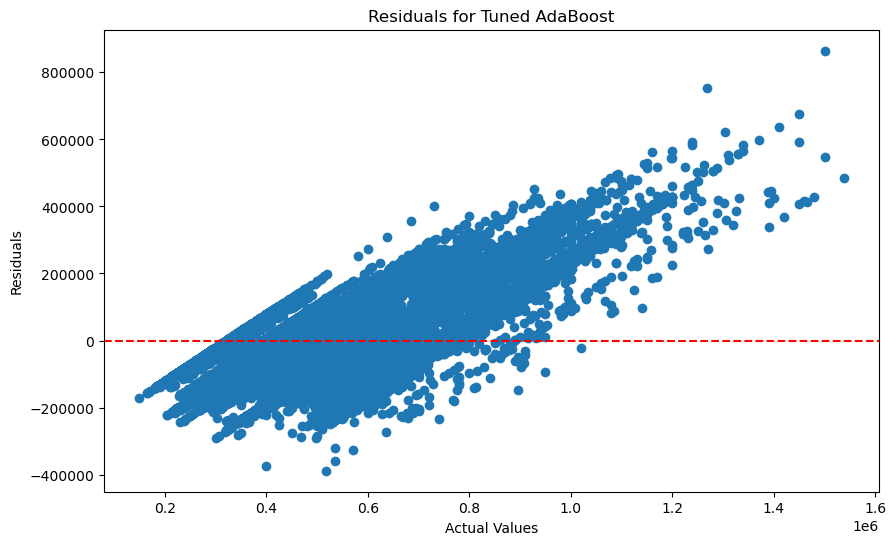

In [31]:
# Predict using the best model
y_pred_ada_tuned = best_ada_model.predict(X_test)

# Evaluate the tuned model
print('\nTuned AdaBoost Performance:')
print(f'MSE: {mean_squared_error(y_test, y_pred_ada_tuned):.2f}')
print(f'R²: {r2_score(y_test, y_pred_ada_tuned):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_ada_tuned):.2f}')

# Residuals for Tuned AdaBoost
residuals_ada_tuned = y_test - y_pred_ada_tuned
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_ada_tuned)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for Tuned AdaBoost')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [33]:
# Calculate performance metrics for each model
metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'R²': [
        r2_score(y_test, y_pred_dt_tuned),
        r2_score(y_test, y_pred_rf_tuned),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_ada_tuned)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_dt_tuned),
        mean_absolute_error(y_test, y_pred_rf_tuned),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_ada_tuned)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_dt_tuned),
        mean_squared_error(y_test, y_pred_rf_tuned),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_ada_tuned)
    ]
}

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)

           Model        R²           MAE           MSE
0  Decision Tree  0.932643  31163.032407  2.147915e+09
1  Random Forest  0.958874  25091.139714  1.311438e+09
2        XGBoost  0.950964  28454.018461  1.563698e+09
3       AdaBoost  0.564286  93600.787881  1.389429e+10
